<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#File-Requirements" data-toc-modified-id="File-Requirements-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>File Requirements</a></span></li><li><span><a href="#Recommended-File-Structure" data-toc-modified-id="Recommended-File-Structure-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Recommended File Structure</a></span></li><li><span><a href="#Initial-Order-of-Operations" data-toc-modified-id="Initial-Order-of-Operations-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Initial Order of Operations</a></span></li></ul></li><li><span><a href="#Load-Progress" data-toc-modified-id="Load-Progress-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Progress</a></span><ul class="toc-item"><li><span><a href="#Expectation-from-Progress-File" data-toc-modified-id="Expectation-from-Progress-File-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Expectation from Progress File</a></span></li></ul></li><li><span><a href="#(Optional)-Set-Paths-to-Specific-Model" data-toc-modified-id="(Optional)-Set-Paths-to-Specific-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>(Optional) Set Paths to Specific Model</a></span></li><li><span><a href="#Get-Best-Model-Fit" data-toc-modified-id="Get-Best-Model-Fit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Best Model Fit</a></span></li><li><span><a href="#Label-Syllables" data-toc-modified-id="Label-Syllables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label Syllables</a></span><ul class="toc-item"><li><span><a href="#Widget-Guide" data-toc-modified-id="Widget-Guide-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Widget Guide</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Instructions</a></span></li></ul></li><li><span><a href="#Interactive-Syllable-Statistics-Graphing" data-toc-modified-id="Interactive-Syllable-Statistics-Graphing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interactive Syllable Statistics Graphing</a></span><ul class="toc-item"><li><span><a href="#Widget-Guide" data-toc-modified-id="Widget-Guide-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Widget Guide</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Instructions</a></span></li></ul></li><li><span><a href="#Compare-Crowd-Movies-and-Syllable-Position-Heatmaps" data-toc-modified-id="Compare-Crowd-Movies-and-Syllable-Position-Heatmaps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Crowd Movies and Syllable Position Heatmaps</a></span><ul class="toc-item"><li><span><a href="#Widget-Guide" data-toc-modified-id="Widget-Guide-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Widget Guide</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Instructions</a></span></li></ul></li><li><span><a href="#Interactive-Syllable-Transition-Graph" data-toc-modified-id="Interactive-Syllable-Transition-Graph-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Interactive Syllable Transition Graph</a></span><ul class="toc-item"><li><span><a href="#Widget-Guide" data-toc-modified-id="Widget-Guide-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Widget Guide</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Instructions</a></span></li></ul></li><li><span><a href="#For-additional-analysis-methods,-such-as-hypothesis-testing-syllable-usage-or-scalar-differences,-check-out-the-provided-notebook-titled:-Model-Results-Extension.ipynb." data-toc-modified-id="For-additional-analysis-methods,-such-as-hypothesis-testing-syllable-usage-or-scalar-differences,-check-out-the-provided-notebook-titled:-Model-Results-Extension.ipynb.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>For additional analysis methods, such as hypothesis testing syllable usage or scalar differences, check out the provided notebook titled: <a href="./Model-Results-Extension.ipynb" target="_blank">Model-Results-Extension.ipynb</a>.</a></span></li></ul></div>

<center><h1>MoSeq2 Interactive Results Exploration Notebook</h1></center>

### File Requirements
In order to use this notebook you will need the following files:
- `progress.yaml`: MoSeq progress yaml file that contains paths to all required moseq data.
- `model.p`: Pretrained ARHMM to compute statistics from.
- `moseq2-index.yaml`: Index file containing paths to extracted sessions that will be used to generate syllable crowd movies.
- `config.yaml`: Configuration file that contains configured parameters throughout the MoSeq pipeline.

### Recommended File Structure
We recommend that your pretrained model is contained in a parent folder, such that all of the newly computed statistics and generated movies can be consolidated in one folder.

```
.
└── Data_Directory/
    ├── (running) Interactive-Model-Results-Exploration.ipynb (2)
    ├── progress.yaml **
    ├── config.yaml **
    ├── moseq2-index.yaml **
    ├── model_session_path/ **     
    ├   └── model.p
    ...
    ├── _pca/
    └──  aggregate_results/

```

### Initial Order of Operations
When running this notebook for the first time, we recommend running the entire notebook linearly. 

If you are revisiting the notebook to view previously computed results, simply load your progress paths, then run any of the interactive tools. 

<center><img src="https://drive.google.com/uc?export=view&id=1TJn53y0SN98LldAUGf6UH1Sno_gmloQN"></center>


## Load Progress

In [3]:
from os.path import join
from moseq2_app.gui.progress import update_progress, restore_progress_vars

from moseq2_app.gui.progress import restore_progress_vars

progress_filepath = '/Users/sherry/Desktop/MoSeq/example-data/small_test_ds_running/progress.yaml'
progress_paths = restore_progress_vars(progress_file=progress_filepath)

Updating notebook variables...


### Expectation from Progress File
The loaded progress file path-dict must contain the following existing paths in order to use the features in this notebook:
```
progress_paths = {'base_dir': './',
                  'config_file': './config.yaml',
                  'index_file': './moseq2-index.yaml',
                  'train_data_dir': './aggregate_results/',
                  'pca_dirname': '_pca/',
                  'scores_filename': 'pca_scores',
                  'scores_path': './_pca/pca_scores.h5',
                  'changepoints_path': './_pca/changepoints.h5',
                  'model_path': './modeling_dir/model.p',
                  'crowd_dir': '',
                  'syll_info': '',
                  }
```

## Get Best Model Fit

Use this feature to determine whether the trained model has captured median syllable durations that match the principal components changepoints.

This feature can also return the best model from a list of models found in the `progress_paths['model_session_path']`.
Once completed, the function will update the progress file with the returned model.

Below are examples of some comparative distributions that you can expect when using this tool:

<table>
    <tr>
        <td>
            <img height=400 width=400 src="https://drive.google.com/uc?export=view&id=1B6R4AGsQHaddwJj-48Pbd_5ZHOZvpttp">
        </td>
        <td>
            <img height=400 width=400 src="https://drive.google.com/uc?export=view&id=1poLAAhNlAdM8T_1Ps6OMs6vNz03NGbgr">
        </td>

Updating notebook variables...
Found 1 models in given input folder: /Users/sherry/Desktop/MoSeq/example-data/small_test_ds_running/saline-amphetamine/
Model closest to PC scores: /Users/sherry/Desktop/MoSeq/example-data/small_test_ds_running/saline-amphetamine/model.p
Variables are the same. No update necessary.


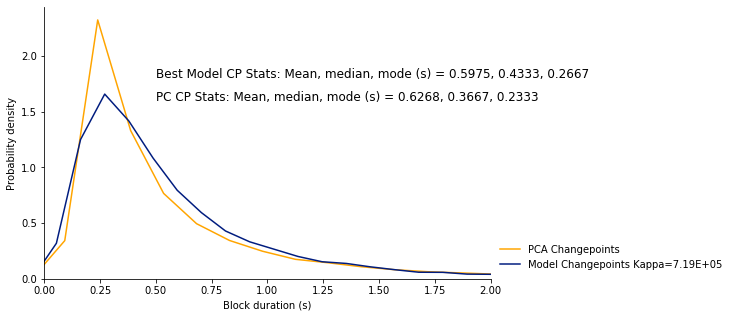

In [4]:
from os.path import join
from moseq2_viz.gui import get_best_fit_model
from moseq2_app.gui.progress import update_progress, restore_progress_vars

progress_paths = restore_progress_vars(progress_filepath)

output_file = join(progress_paths['plot_path'], 'model_vs_pc_changepoints')

best_model_fit = get_best_fit_model(progress_paths, plot_all=True)
progress_paths = update_progress(progress_filepath, 'model_path', best_model_fit['best model - duration'])

## (Optional) Set Paths to Specific Model

If you do not already have a set `model_path` in your `progress_paths` dictionary, set the paths in the cell below.

In [5]:
model_path = progress_paths['model_path'] # replace this with a desired updated path
model_session_path = progress_paths['model_session_path'] # replace this with a desired updated path

update_progress(progress_filepath, 'model_session_path', model_session_path)
progress_paths = update_progress(progress_filepath, 'model_path', model_path)

Variables are the same. No update necessary.
Variables are the same. No update necessary.


## Compute Syllable Statistics

This cell will produce 2 dataframes: `scalar_df` and `mean_df`.
 - `scalar_df` is a vertically stacked dataframe of scalar values measured during the extraction step, aligned with the model_labels and timestamps. The shape would be (sum_of_session_frames, 31). To view all the measured scalars, print(scalar_df.columns)
   - This dataframe can be used to plot the scalar feature values for any session over time.
 - `mean_df` is a dataframe of the average syllable-scalar values for all the features included in `scalar_df` grouped by the resorted syllable labels, model groups and uuids.
   - This dataframe will be used to plot mean syllable statistics and perform hypothesis testing.

### Compute sclar_df

In [6]:
from moseq2_viz.util import parse_index
from moseq2_viz.scalars.util import scalars_to_dataframe


_, sorted_index = parse_index(progress_paths['index_file'])

# compute session scalar data
scalar_df = scalars_to_dataframe(sorted_index, model_path=progress_paths['model_path'])

print('The shape of scalar_df', scalar_df.shape)
scalar_df.head()


The shape of scalar_df (719401, 31)


,angle,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,height_ave_mm,length_mm,length_px,...,timestamps,frame index,SessionName,SubjectName,StartTime,labels (original),labels (usage sort),labels (frames sort),onset,syllable index
0,2.900692,951.181030,584.0,-373.105377,23.917204,-203.016129,88.947258,35.982876,62.172127,38.672935,...,7.293882e+08,0.0,amphetamine_example_3,000076,2019-03-21T11:49:19.3674777-04:00,-5,-5,-5,True,0
1,2.826284,876.259216,538.0,-371.513062,24.907682,-202.793655,89.082100,36.513012,58.768295,36.555653,...,7.293882e+08,1.0,amphetamine_example_3,000076,2019-03-21T11:49:19.3674777-04:00,-5,-5,-5,False,1
2,2.711312,830.654663,510.0,-369.944031,25.883665,-202.827957,89.061302,38.847057,57.973740,36.061413,...,7.293882e+08,2.0,amphetamine_example_3,000076,2019-03-21T11:49:19.3674777-04:00,-5,-5,-5,False,2
3,2.679276,829.025940,509.0,-368.866943,26.553637,-202.388657,89.327576,35.831039,57.489338,35.760101,...,7.293883e+08,3.0,amphetamine_example_3,000076,2019-03-21T11:49:19.3674777-04:00,97,30,36,True,3
4,2.731105,802.966187,493.0,-370.283539,25.672470,-202.927307,89.001091,38.036510,57.531811,35.786522,...,7.293883e+08,4.0,amphetamine_example_3,000076,2019-03-21T11:49:19.3674777-04:00,97,30,36,False,4


In [7]:
# Save `scalar_df` as a csv file
# set export = True if you want to export scalar_df for further analysis outside of this notebook.
# Specify the place you want to save the dataframe in `save_path`. If empty, the file will be save to `base_dir`

from os.path import exists, join
base_dir = progress_paths['base_dir']
export = True
save_path = ""
if export:
    # Ensure path exist 
    if len(save_path) ==0:
        save_path = base_dir
    else:
        try:
            assert exists(save_path)
        except AssertionError:
            save_path = base_dir
            print('This is not a valid path. Dataframe csv will be saved to base_dir')
    print("Dataframe will be saved to", save_path)
    scalar_df.to_csv(join(save_path,'scalar_df.csv'), index=False)
    print('Dataframe is saved')

Dataframe will be saved to /Users/sherry/Desktop/MoSeq/example-data/small_test_ds_running
Dataframe is saved


### Compute mean_df

In [8]:
from moseq2_viz.model.util import compute_behavioral_statistics
# compute syllable usage and scalar statistics
mean_df = compute_behavioral_statistics(scalar_df, count='usage', groupby=['group', 'uuid'], usage_normalization=True)

print('The shape of mean_df', mean_df.shape)
mean_df.head()

The shape of mean_df (1160, 26)


,group,uuid,syllable,usage,duration,angle,area_mm,area_px,centroid_x_mm,centroid_x_px,...,velocity_2d_px,velocity_3d_mm,velocity_3d_px,velocity_theta,width_mm,width_px,dist_to_center_px,timestamps,frame index,syllable key
0,amphetamine,1dbdaf3b-d405-4fcc-9b90-3c3585248ff4,0,0.069094,0.413063,-3.394453,830.892517,508.623230,-217.488388,121.119499,...,1.123899,2.008167,1.353535,-0.158190,30.299555,18.310436,164.057129,6.890642e+08,15924.174482,labels (usage sort)
1,amphetamine,1e3b146c-b026-4847-9e77-87b29988ad3d,0,0.077628,0.544928,2.540901,805.606689,494.621216,-200.782593,131.107178,...,1.205564,2.160848,1.467844,-0.032022,29.523809,17.895060,162.120789,6.667464e+08,19658.622340,labels (usage sort)
2,amphetamine,2bbe10f9-284f-416e-90b4-f9c4ab20fab2,0,0.091794,0.420202,-1.689119,833.575317,513.330139,-196.773987,133.233078,...,0.925037,1.843830,1.358000,0.039963,30.433571,18.501883,165.433258,6.730249e+08,17162.856971,labels (usage sort)
3,amphetamine,407102da-1114-499b-a7ab-34e198fd9ffb,0,0.073906,0.494558,0.832096,858.256531,526.946838,-215.901947,121.702477,...,0.770226,1.506225,1.090760,0.109995,30.381113,18.414692,163.492584,7.300943e+08,21182.879872,labels (usage sort)
4,amphetamine,8d36c6be-7e70-491d-a0a1-0826c4b79b05,0,0.042211,0.349603,1.144892,865.947693,533.265625,-207.111084,126.783783,...,0.815488,1.750065,1.343804,0.061938,30.610741,18.609592,174.183075,6.642644e+08,15465.686720,labels (usage sort)


In [9]:
# Save `scalar_df` as a csv file
# set export = True if you want to export mean_df for further analysis outside of this notebook

# Specify the place you want to save the dataframe in `save_path`. 
# If empty, the file will be save to `base_dir`.
base_dir = progress_paths['base_dir']
export = True
save_path = ""

if export:
    # Ensure path exist
    if len(save_path) ==0:
        save_path = base_dir
    else:
        try:
            assert exists(save_path)
        except AssertionError:
            save_path = base_dir
            print('This is not a valid path. Dataframe csv will be saved to base_dir')
    print("Dataframe will be saved to", save_path)
    mean_df.to_csv(join(save_path,'mean_df.csv'), index=False)
    print('Dataframe is saved')

Dataframe will be saved to /Users/sherry/Desktop/MoSeq/example-data/small_test_ds_running
Dataframe is saved


## Label Syllables

Use this feature to simplify interpretting the syllable statistics down the line by viewing the syllable crowd movie and some scalar metrics to determine which behaviors the syllable states represent.


<center><h3>Widget Guide</h3></center>
<img height=75% width=75% src="https://drive.google.com/uc?export=view&id=1zJSvj_7XF73TvVGTCfT1t79YIZNMWfBQ">
<h3>Instructions</h3>
<ol>
    <li style="text-align:left;">
        Use the crowd movie and the presented syllable scalar table to help guide your labeling decisions.
    </li>
    <li style="text-align:left;">
        Use the playback slider to control the speed you can view the crowd movies. Watching some crowd movies in slow motion can aid in accurately labeling fast/short syllables.
    </li>
    <li style="text-align:left;">
        Enter the syllable name and desired description into the text fields.
    </li>
    <li style="text-align:left;">
        Use either the dropdown menu widget or the "Next" and "Previous" buttons to navigate between syllables.
    </li>
    <li style="text-align:left;">
        Once all the syllables are labeled, click the "Save Setting" button to write your current session changes to your syllable information yaml file.
    </li>
</ol>

Loading BokehJS ...

Variables are the same. No update necessary.
Variables are the same. No update necessary.
Variables are the same. No update necessary.
Number of syllables explaining 99% variance: 40
Loading parquet files


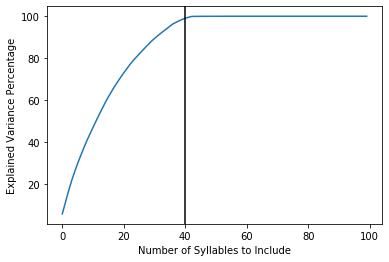

Button(description='Clear Output', style=ButtonStyle(), tooltip='Close Cell Output')

Dropdown(description='Syllable #:', options={'0 - ': {'label': '', 'desc': '', 'crowd_movie_path': '/Users/she…

Output()

In [10]:
from os.path import join
from moseq2_app.main import label_syllables
from moseq2_app.gui.progress import update_progress

# Path to generate crowd movies in
crowd_dir = join(progress_paths['model_session_path'], 'crowd_movies/')

# Path to file containing Syllable label information
syll_infopath = join(progress_paths['model_session_path'], 'syll_info.yaml')

# convenience file containing reused syllable statistics data
syll_info_df_path = join(progress_paths['model_session_path'], 'syll_df.parquet')

# Select number of syllables based on an explained variance percentage
explained_variance = 99

# To instead label a fixed number of syllables, set max_syllables <= nstates
max_syllables = None

update_progress(progress_filepath, 'crowd_dir', crowd_dir)
update_progress(progress_filepath, 'syll_info', syll_infopath)
progress_paths = update_progress(progress_filepath, 'df_info_path', syll_info_df_path)

label_syllables(progress_paths, max_syllables=max_syllables, n_explained=explained_variance)

## Interactive Syllable Statistics Graphing

Use this tool to interactively plot different syllable statistics and their differences in the modeled groups. The dendrogram displayed below the statistics plot represents the hierarchically sorted pairwise distances between the given model's autoregressive matrices representing the syllables.

<br>
<center><h3>Widget Guide</h3></center>
<img height=75% width=75% src="https://drive.google.com/uc?export=view&id=1Z5VFK_XiK5U-jvRL7x7QzLAmiGmwtAig">

<h3 style="text-align:left;">Instructions</h3>
<table>
    <tr>
        <td style="width: 45%;">
            <ol>
                <li style="text-align:left; font-size:15px;">
                    Use the "Statistic Selector" to select a syllable statistic to plot.
                </li>
                <li style="text-align:left; font-size:15px;">
                    Toggle the plotted error bars using the "Error Bars" dropdown menu.
                </li>
                <li style="text-align:left; font-size:15px;">
                    To resort the syllables with respect to some given statistics, use the Sorting Dropdown.
                    <ul>
                        <li style="text-align:left; font-size:15px;">Select "Difference" to sort the syllables from largest to smallest difference between two selected groups.</li>
                        <ul>
                            <li style="text-align:left; font-size:15px;">Upon resorting the syllables, the outputted plot will also include highlighted "Significant Syllables" computed via a pairwise comparison using Kruskal-Wallis and Dunn's Test. The Significant Syllables will be shown as red diamonds instead of the circular points.</li>
                        </ul>
                        <li style="text-align:left; font-size:15px;">
                            Select "Similarity" to reorder the syllables by the model states' autoregressive matrices. The ordering will be identical to the leaves of the dendrogram located under the main plot. 
                        </li>
                    </ul>
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the "Grouping" dropdown menu to select the desired data to plot.
                    <ul>
                        <li style="text-align:left; font-size:15px;">
                            If "group" is selected, then the mean of all the sessions within a single group will be displayed.
                        </li>
                        <li style="text-align:left; font-size:15px;">
                           If "SessionName" is selected, use the displayed MultipleSelect menu to display individual session's syllable statistics. The mean of each selected session's group will also be displayed as a dashed line. Use CTRL/SHIFT/COMMAND keys to handle multiple row selection.
                        </li>
                        <li style="text-align:left; font-size:15px;">
                           Note: you can click on the legend items to selectively hide the corresponding datapoints.
                        </li>
                    </ul>
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the Syllable Spotlight text field to filter your plot to only include syllables with the label string inputted into the text field.
                </li>
                <li style="text-align:left; font-size:15px;">
                    <ul>
                        <li style="text-align:left; font-size:15px;">Use the Thresholding Slider to filter out syllables that are not included in the selected range to display.</li>
                        <li style="text-align:left; font-size:15px;">Use the "Threshold By" dropdown widget in order to set the statistic the Threshold Slider will filter the data by.</li>
                    </ul>
                </li>
                <li style="text-align:left; font-size:15px;">
                    Hover over the circle datapoints to display a pop-up window with additional syllable metadata.
                </li>
            </ol>
        </td>
        <td>
            <img src="https://drive.google.com/uc?export=view&id=1nPRW6GHu0vlOswx0cGy-1MzYdeSaeJpW">
            <img src="https://drive.google.com/uc?export=view&id=1Bc3KpTA9dCz04PXzojpOvsahaw4a8NP3">
        </td>
    </tr>
</table>

In [11]:
from moseq2_app.main import interactive_syllable_stats

max_syllables = None

# If loading parquet files is taking too long, set load_parquet=False
interactive_syllable_stats(progress_paths, max_syllable=max_syllables, load_parquet=True)

Loading parquet files


Button(description='Clear Output', style=ButtonStyle(), tooltip='Close Cell Output')

Output()

## Compute Syllable Transition Matrices

Note this this code block is loading the model from the `model_path`, and is __not__ using the `mean_df` variable.

- `model_data` (dict): dictionary containing all model data.
- `labels` (list of 1D-arrays): list of label predictions for each session that the model was trained on.
- `label_group` (list of strs): list of group names corresponding to each index in the `labels` variable.
- `group` (list of strs): list of all unique group names in `label_groups`.
- `trans_mats` (list of 2D arrays): transition matrices for each group, corresponding to each index in `group`.
- `usages` (list of OrderedDicts): syllable usage ratios for each group, corresponding to each index in `trans_mats` and `group`.



In [ ]:
from moseq2_viz.model.util import parse_model_results, relabel_by_usage
from moseq2_viz.model.trans_graph import get_trans_graph_groups, get_group_trans_mats
from moseq2_viz.model.util import compute_syllable_explained_variance


# load your model
model_path = progress_paths['model_path']
model_data = parse_model_results(model_path)
model_data['labels'] = relabel_by_usage(model_data['labels'], count='usage')[0]
max_syllable = compute_syllable_explained_variance(model_data, n_explained=99)


# select a transition matrix normalization method
normalize = 'bigram' # other options: 'columns', 'rows'

# Get modeled session uuids to compute group-mean transition graph for
label_group, uuids = get_trans_graph_groups(model_data)
group = list(set(label_group))
# compute transition matrices and usages for each group
print('Group(s):', group)
trans_mats, usages = get_group_trans_mats(model_data['labels'], label_group, group, max_syllable, normalize=normalize)

## Export Transition Matrices and usages (Optional)

In [ ]:
import pandas as pd

# If users want to export transition matrices and usages, set export = True
export = True
selected_group = "saline" #@param {type:"string"}
save_path = "" #@param {type:"string"}

group_index = next(i for i, g in enumerate(group) if g == selected_group)

group_trans = pd.DataFrame(trans_mats[group_index])
group_usages = []

for key, value in usages[group_index].items():
  group_usages.append([key, value])
group_usages = pd.DataFrame(group_usages)
group_usages.set_axis(['Syllable', 'Usage'], axis = 1, inplace = True)
if export:
  # Ensure path exist
  if len(save_path) ==0:
    save_path = base_dir
  else:
    try:
      assert exists(save_path)
    except AssertionError:
      save_path = base_dir
      print('This is not a valid path. Dataframe csv will be saved to base_dir')
  print("Dataframe will be saved to", save_path)
  group_trans.to_csv(join(save_path,selected_group+'_trans.csv'), index=False)
  group_usages.to_csv(join(save_path,selected_group+'_usage.csv'), index=False)
  print('Dataframe is saved')

## Interactive Syllable Transition Graph

Use this tool to explore the behavioral transiton space of your modeled groups. Find sequences of behavior,
 e.g. bigrams/trigrams, at different usage/transition probability ranges, and gain a better understanding of the
 differences across your modeling groups. 
__Note: do not arbitrarily threshold transition graphs for publication purposes.
 This tool is mainly aimed to explore different behavioral spaces of your modeled groups.__ 

<center><h3>Widget Guide</h3></center>
<img src="https://drive.google.com/uc?export=view&id=1pkQ99kIkQ6veAwTsRQ0sb56coq_yK9u6">

<h3 style="text-align:left;">Instructions</h3>
<table>
    <tr>
        <td style="width: 45%;">
            <ol>
                <li style="text-align:left; font-size:15px;">
                    Use the "Graph Layout" DropDown Menu to control the displayed node layouts. You can use the Bokeh graph tools to control zoom and panning functionalities.
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the Edge Thresholding Range Slider to select ranges of syllable transition probabilities to display in all the graphs.
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the Usage Thresholding Slider to select nodes/syllables within the range of syllable usages to display. Note: Nodes outside of the selected range will be hidden.
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the DropDown Menu to color the nodes by any of the selected syllable scalars.
                </li>
                <li style="text-align:left; font-size:15px;">
                    Use the Speed Thresholding Slider to select nodes/syllables to display within the selected range of speeds.
                </li>
            </ol>
        </td>
        <td>
            <img src="https://drive.google.com/uc?export=view&id=1YZhg9BVNTTpg-RZUxYu2Xk-wUqr1FD3m">
        </td>
    </tr>
</table>

Run this cell to disable scrolling in cell output to display the entire view

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
from moseq2_app.main import interactive_transition_graph

max_syllables = None

interactive_transition_graph(progress_paths, max_syllables=max_syllables, plot_vertically=True, load_parquet=True)

***

# Notebook End 

# User Survey

Please take some time to tell us your thoughts about this notebook:
**[user feedback survey](https://forms.gle/FbtEN8E382y8jF3p6)**